In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

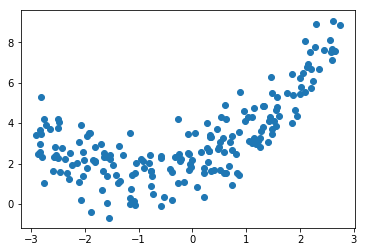

In [59]:
m=200
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)
plt.scatter(X,y)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
polyF=PolynomialFeatures(degree=2,include_bias=False)
X_poly=polyF.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.96992374]
[1.96992374 3.88059954]


In [23]:
from sklearn.linear_model import LinearRegression
linearR = LinearRegression()
linearR.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
linearR.coef_,linearR.intercept_

(array([[0.96404466, 0.52060138]]), array([1.78655902]))

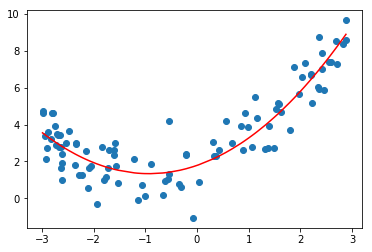

In [35]:
plt.scatter(X,y)
X_sort = np.sort(X,axis=0)
X_poly_sort = polyF.fit_transform(X_sort)
y_predict=linearR.predict(X_poly_sort)
plt.plot(X_sort,y_predict,'r-',label='Predictions')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [56]:
def plot_learning_curve(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    train_error,test_error=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_test_predict=model.predict(X_test)
        train_error.append(mean_squared_error(y_train_predict,y_train[:m]))
        test_error.append(mean_squared_error(y_test_predict,y_test))

    plt.plot(np.sqrt(train_error),'g--',label='train-error')
    plt.plot(np.sqrt(test_error),'r--',label='test-error')
    plt.legend()
    plt.show()

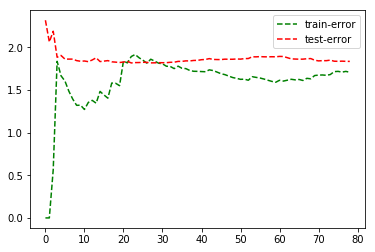

In [51]:
lin_reg=LinearRegression()
plot_learning_curve(lin_reg,X,y)

In [52]:
from sklearn.pipeline import Pipeline

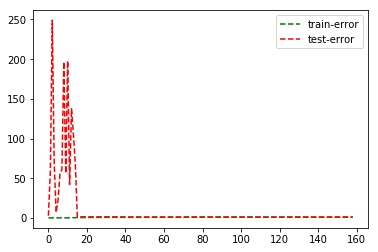

In [60]:
polynomial_regression = Pipeline((('polynomial',PolynomialFeatures(degree=10,include_bias=False)),
                                  ('Linear',LinearRegression()),
                                 ))
plot_learning_curve(polynomial_regression,X,y)